<a href="https://colab.research.google.com/github/sauravkumar19/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
import numpy as np
import scipy
import pandas as pd
import math
import random
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/AlmaBetter_Capstone_projects/capstone_project4/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df = pd.read_csv(path)

In [4]:
netflix_data = df.copy()

In [5]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Our dataset have 12 columns and 7787 rows. 

In [7]:
netflix_data.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [8]:
def remove_nan_value(df,th = 80.0):
  
  null_percentage = df.isnull().sum()/len(df)
  print(null_percentage)
  print('*'*50)

  #step1
  #preserving columns having at least 20% of not null values
  df.dropna(axis=1,inplace=True,thresh=((th/100.0)*df.shape[0]))
  #preserving rows having at least 20% of not null values
  df.dropna(axis=0,inplace=True,thresh=((th/100.0)*df.shape[1]))

  null_percentage = df.isnull().sum()/len(df)
  print(null_percentage)
  print('*'*50)

  #step2
  duplicates = len(df[df.duplicated()])
  print('Duplicate value present in data is', duplicates)
  df.drop_duplicates(inplace=True,ignore_index=True)

  numeric_column = df.describe().columns
  cateogorical_column = df.describe(include = 'object').columns

  for item in null_percentage.iteritems():
    if (item[0] in cateogorical_column) and (item[1] != 0):
      frequency = df[item[0]].value_counts().sort_values(ascending = False)
      if frequency[0]/len(df) > 0.3:
        df[item[0]].fillna(frequency.index[0], inplace = True)
      else:
        df[item[0]].fillna('other',inplace = True)

    if (item[0] in numeric_column) and (item[1] != 0):
      df[item[0]].fillna(df[item[0]].mean(), inplace = True)

  null_percentage = df.isnull().sum()/len(df)
  print(null_percentage)  

In [9]:
remove_nan_value(netflix_data)

show_id         0.000000
type            0.000000
title           0.000000
director        0.306793
cast            0.092205
country         0.065109
date_added      0.001284
release_year    0.000000
rating          0.000899
duration        0.000000
listed_in       0.000000
description     0.000000
dtype: float64
**************************************************
show_id         0.000000
type            0.000000
title           0.000000
cast            0.092205
country         0.065109
date_added      0.001284
release_year    0.000000
rating          0.000899
duration        0.000000
listed_in       0.000000
description     0.000000
dtype: float64
**************************************************
Duplicate value present in data is 0
show_id         0.0
type            0.0
title           0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64


## EDA

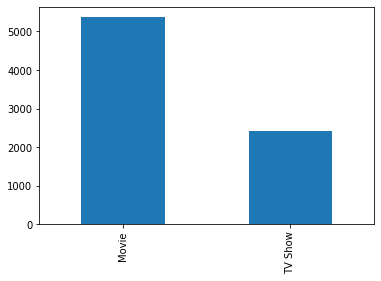

In [10]:
netflix_data['type'].value_counts().plot(kind = 'bar')

In [11]:
shows_movie = netflix_data.groupby('release_year')['type'].value_counts().unstack()
shows_movie.fillna(0,inplace = True)
shows_movie

type,Movie,TV Show
release_year,,
1925,0.0,1.0
1942,2.0,0.0
1943,3.0,0.0
1944,3.0,0.0
1945,3.0,0.0
...,...,...
2017,744.0,268.0
2018,734.0,387.0
2019,582.0,414.0


In [12]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix_data['target_ages'] = netflix_data['rating'].replace(ratings)

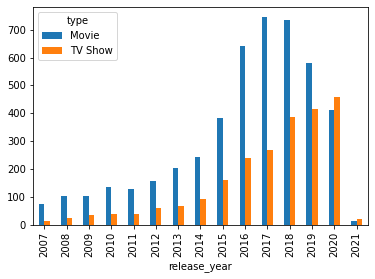

In [13]:
shows_movie.tail(15).plot(kind = 'bar')

In [14]:
movie_rate = netflix_data.groupby('target_ages')['type'].value_counts().unstack()
movie_rate.fillna(0,inplace = True)
movie_rate

type,Movie,TV Show
target_ages,,
Adults,2600,1027
Kids,267,246
Older Kids,852,478
Teens,1658,659


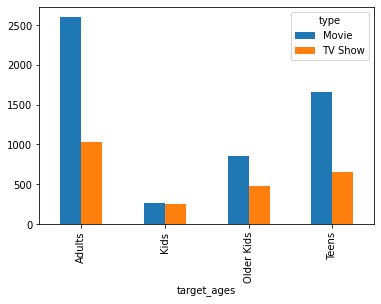

In [15]:
movie_rate.plot(kind = 'bar')

In [16]:
netflix_data['month'] = netflix_data['date_added'].apply(lambda x: x.split()[0])
netflix_data['min and season'] = netflix_data['duration'].apply(lambda x: x.split()[0])

In [17]:
netflix_data.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month,min and season
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,August,4
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,December,93
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,December,78
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,November,80
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,January,123


In [21]:
features = ['type','cast','country','target_ages','listed_in','month','min and season','title']
cast_table = netflix_data[features]
cast_table.head()

,type,cast,country,target_ages,listed_in,month,min and season,title
0,TV Show,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,Adults,"International TV Shows, TV Dramas, TV Sci-Fi &...",August,4,3%
1,Movie,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,Adults,"Dramas, International Movies",December,93,7:19
2,Movie,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,Adults,"Horror Movies, International Movies",December,78,23:59
3,Movie,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,Teens,"Action & Adventure, Independent Movies, Sci-Fi...",November,80,9
4,Movie,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,Teens,Dramas,January,123,21


In [22]:
for i in ['cast','listed_in', 'country']:
  cast_table[i] = cast_table[i].apply(lambda x: x.split(','))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
def explode_column(df,column):
  if column == 'listed_in':
    df = df.explode(column)
    df[column] = df[column].apply(lambda x: x.split('&'))
    df = df.explode(column)
    df[column] = df[column].apply(lambda x: x.split()[0] if x.split()[0] != 'TV' else x.split()[1])
  elif column == 'country':
    df = df.explode(column)
    df.index = range(0,len(df))
    blank_index = df[df[column] == ''].index
    df = df.drop(blank_index)
  else:
    df = df.explode(column)

  return df



In [24]:
cast_table.shape

(7787, 8)

In [23]:
cast_table['listed_in'] = cast_table['listed_in'].apply(lambda x: x.split('&'))
cast_table = cast_table.explode('listed_in')

In [24]:
cast_table['listed_in'] = cast_table['listed_in'].apply(lambda x: x.split()[0] if x.split()[0] != 'TV' else x.split()[1])

In [25]:
cast_table.index = range(0,len(cast_table))
cast_table.head()

,type,cast,country,target_ages,listed_in,month,min and season,title
0,TV Show,João Miguel,Brazil,Adults,International,August,4,3%
1,TV Show,João Miguel,Brazil,Adults,Dramas,August,4,3%
2,TV Show,João Miguel,Brazil,Adults,Sci-Fi,August,4,3%
3,TV Show,João Miguel,Brazil,Adults,Fantasy,August,4,3%
4,TV Show,Bianca Comparato,Brazil,Adults,International,August,4,3%


In [26]:
cast_table.index = range(0,len(cast_table))
blank_index = cast_table[cast_table['country'] == ''].index
cast_table = cast_table.drop(blank_index)

In [27]:
cast_table = cast_table.drop(blank_index)
  

In [25]:
cast_table.head()

,type,cast,country,target_ages,listed_in,month,min and season,title
0,TV Show,"[João Miguel, Bianca Comparato, Michel Gomes...",[Brazil],Adults,"[International TV Shows, TV Dramas, TV Sci-F...",August,4,3%
1,Movie,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",[Mexico],Adults,"[Dramas, International Movies]",December,93,7:19
2,Movie,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",[Singapore],Adults,"[Horror Movies, International Movies]",December,78,23:59
3,Movie,"[Elijah Wood, John C. Reilly, Jennifer Conne...",[United States],Teens,"[Action & Adventure, Independent Movies, Sci...",November,80,9
4,Movie,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",[United States],Teens,[Dramas],January,123,21


In [69]:
cast_table = cast_table.explode('cast')
cast_table['cast'] = cast_table['cast'].apply(remove_unwanted_space)

In [70]:
cast_table['cast'].value_counts().head(10)

other               718
Anupam Kher          42
Shah Rukh Khan       35
Om Puri              30
Naseeruddin Shah     30
Takahiro Sakurai     29
Akshay Kumar         29
Yuki Kaji            27
Amitabh Bachchan     27
Paresh Rawal         27
Name: cast, dtype: int64

In [29]:
cast_table.groupby('title')['listed_in'].unique()

title
#Alive                                [Horror, International, Thrillers]
#AnneFrank - Parallel Stories             [Documentaries, International]
#FriendButMarried                      [Dramas, International, Romantic]
#FriendButMarried 2                    [Dramas, International, Romantic]
#Roxy                                               [Comedies, Romantic]
                                                  ...                   
忍者ハットリくん                                                  [Anime, Kids']
海的儿子                                             [International, Dramas]
마녀사냥                             [International, Korean, Stand-Up, Talk]
반드시 잡는다                               [Dramas, International, Thrillers]
최강전사 미니특공대 : 영웅의 탄생                                   [Children, Family]
Name: listed_in, Length: 7787, dtype: object

In [26]:
def remove_unwanted_space(string):
  if string[0] == ' ':
    return string[1:]
  elif string[-1] == ' ':
    return string[:-1]
  else:
    return string

In [104]:
for i in ['cast','listed_in', 'country']:
  cast_table[i] = cast_table[i].apply(remove_unwanted_space)

In [27]:
def genre_wise_eda(df,column1,column2):

  df = explode_column(df,column1)
  df[column1] = df[column1].apply(remove_unwanted_space)
  column1_total_genre = df[column1].value_counts()

  df = explode_column(df,column2)
  df[column2] = df[column2].apply(remove_unwanted_space)

  column1_genre = df.groupby(column1)[column2].value_counts()
  column1_unique = df[column1].unique()

  column1_genre_dict = {}
  for items in column1_unique:
    column1_tuple = column1_genre[items].to_dict()
    column1_genre_dict[items] = column1_tuple

  column1_genre = pd.Series(column1_genre_dict)
  column1_genre.index.name = column1
  column1_genre.name = 'genre'

  column1_total_genre = df.groupby(column1)[column2].size()

  t2 = pd.merge(column1_genre,column1_total_genre, how ='inner',on =column1).sort_values(by = column2,ascending = False).head(10)
  


  if t2.index[0] == 'other':
    t2[1:].plot(kind = 'bar', figsize = (10,7))
    for iter,row in t2['genre'][1:].iteritems():
      series = pd.Series(row)
      series.index.name = iter
      fig = plt.figure(figsize = (10,7))
      ax = fig.gca()
      series.plot(kind = 'bar',ax = ax)

  else:
    t2.plot(kind = 'bar', figsize = (10,7))
    for iter,row in t2['genre'].iteritems():
      series = pd.Series(row)
      series.index.name = iter
      fig = plt.figure(figsize = (10,7))
      ax = fig.gca()
      series.plot(kind = 'bar',ax = ax)

  return t2

,genre,listed_in
cast,,
other,"{'Documentaries': 380, 'International': 252, '...",1415
Anupam Kher,"{'International': 38, 'Dramas': 28, 'Comedies'...",137
Shah Rukh Khan,"{'International': 32, 'Dramas': 28, 'Comedies'...",114
Akshay Kumar,"{'International': 27, 'Dramas': 15, 'Comedies'...",97
Naseeruddin Shah,"{'Dramas': 26, 'International': 25, 'Comedies'...",93
Om Puri,"{'International': 27, 'Dramas': 19, 'Comedies'...",93
Amitabh Bachchan,"{'International': 22, 'Dramas': 20, 'Action': ...",87
Paresh Rawal,"{'International': 25, 'Comedies': 17, 'Dramas'...",85
Boman Irani,"{'International': 24, 'Comedies': 15, 'Dramas'...",84


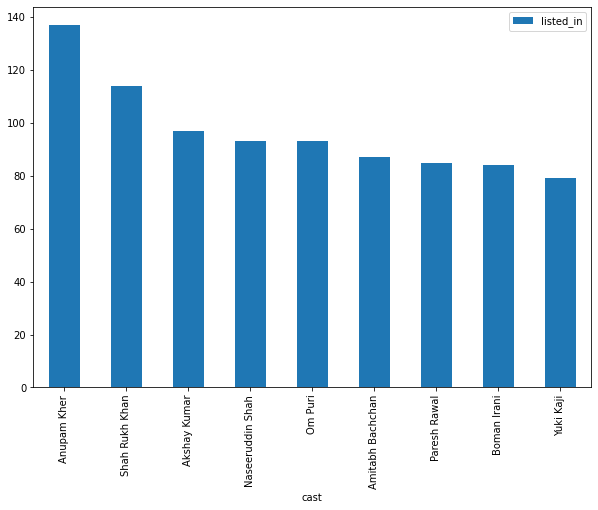

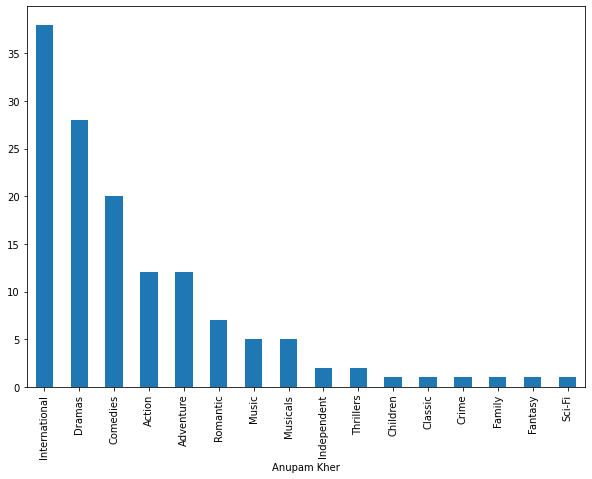

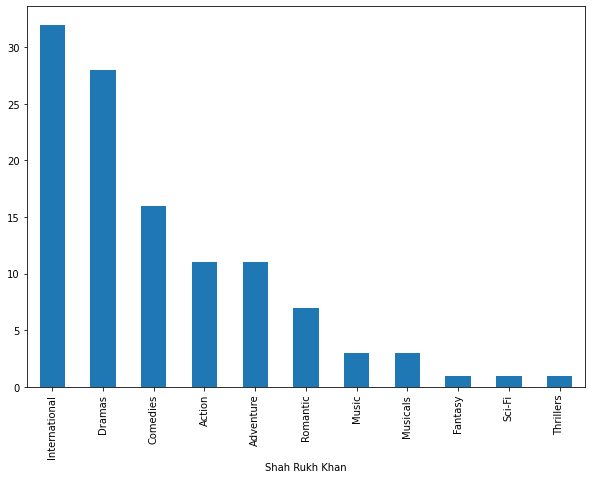

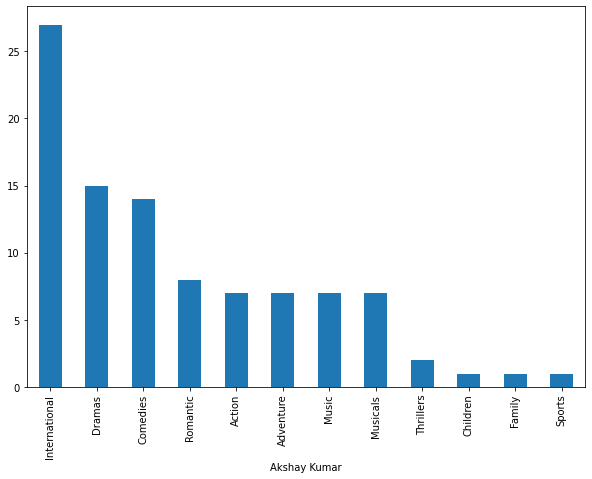

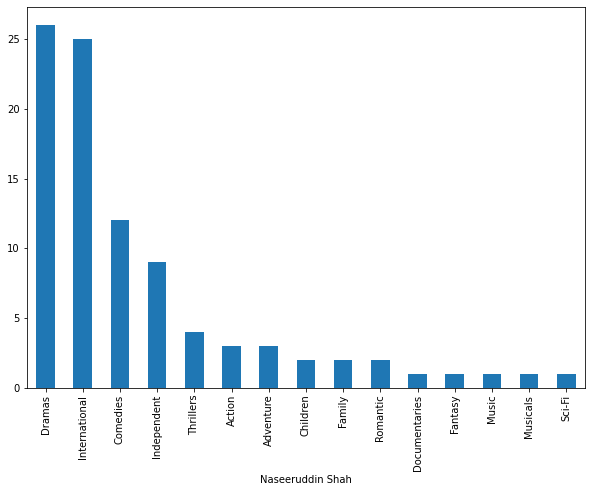

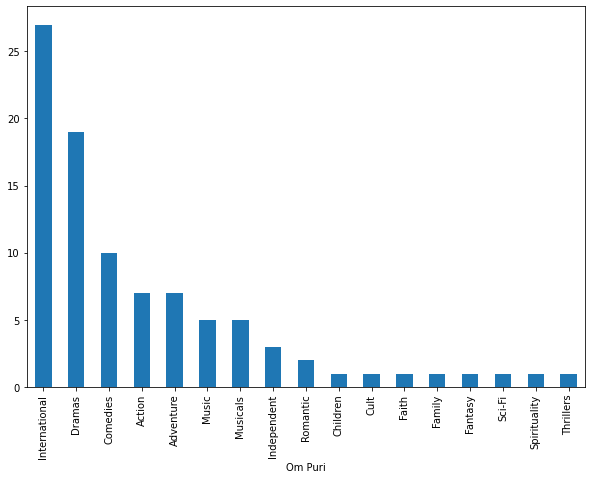

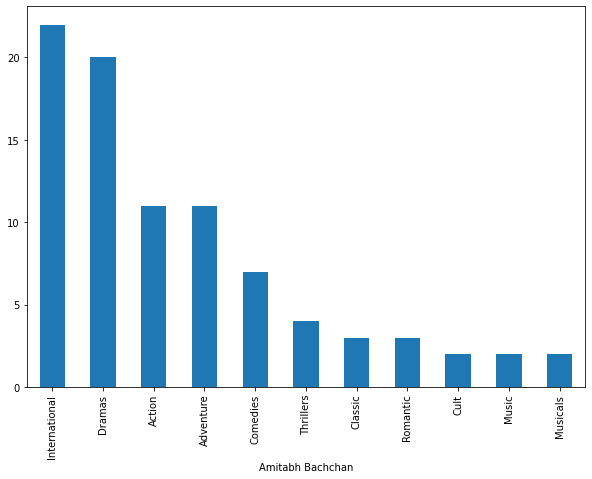

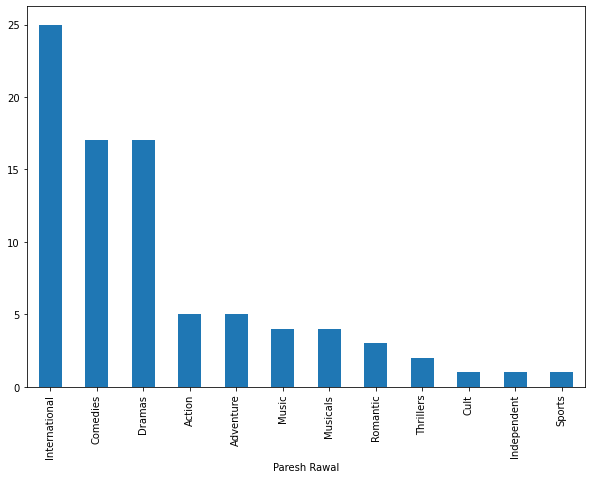

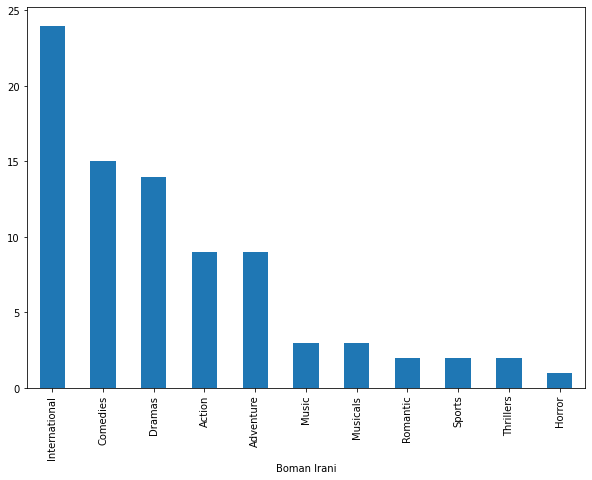

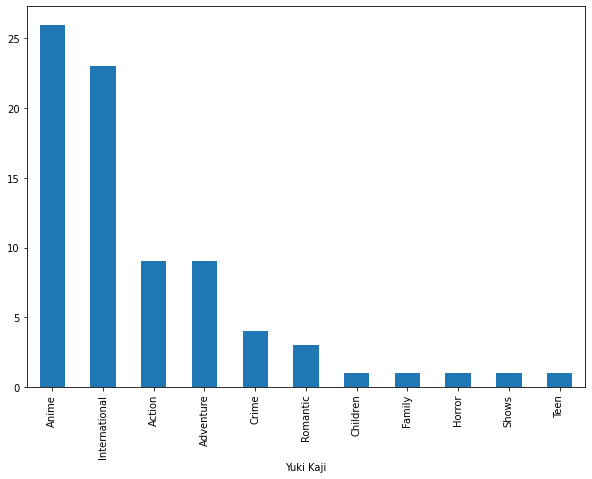

In [28]:
genre_wise_eda(cast_table,'cast','listed_in')

,genre,listed_in
country,,
United States,"{'Dramas': 1062, 'Comedies': 923, 'Documentari...",8367
India,"{'International': 888, 'Dramas': 651, 'Comedie...",2940
United Kingdom,"{'International': 265, 'British': 212, 'Dramas...",1830
Canada,"{'Comedies': 110, 'Dramas': 103, 'Internationa...",975
France,"{'International': 231, 'Dramas': 170, 'Comedie...",896
Japan,"{'International': 200, 'Anime': 188, 'Action':...",744
South Korea,"{'International': 178, 'Korean': 131, 'Romanti...",625
Spain,"{'International': 181, 'Dramas': 84, 'Comedies...",586
Germany,"{'International': 115, 'Dramas': 88, 'Comedies...",518


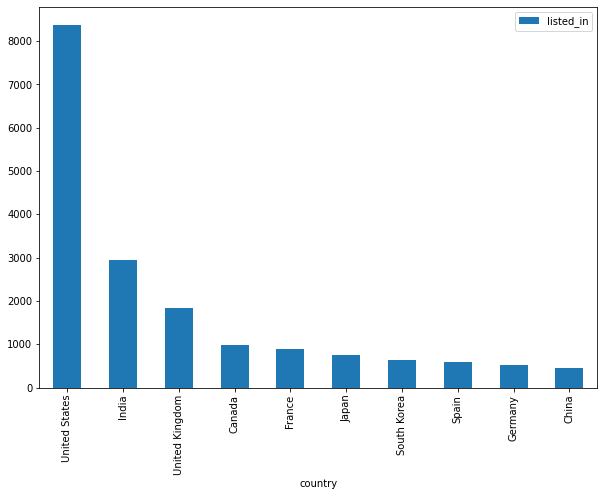

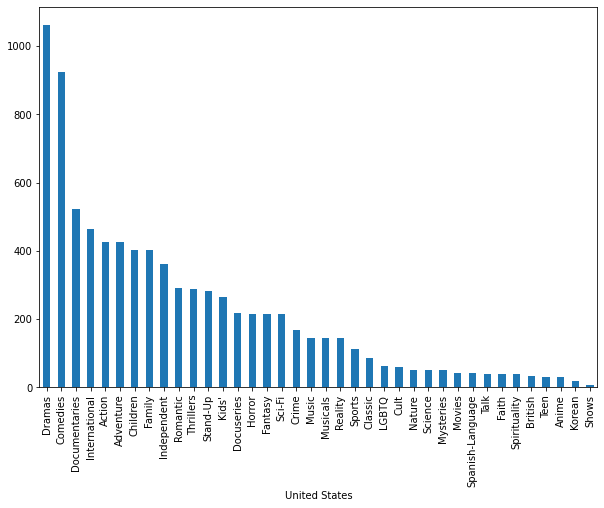

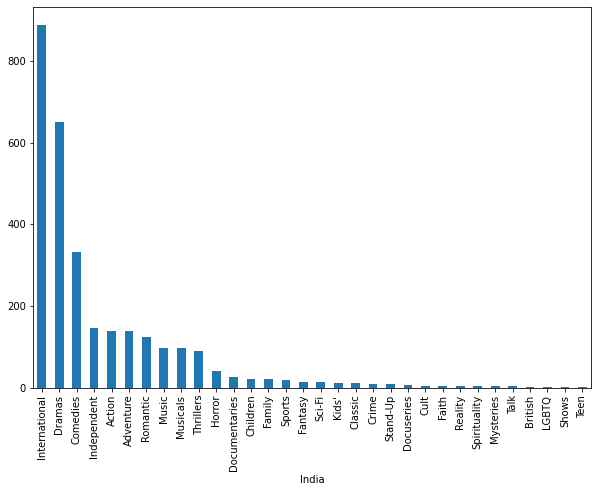

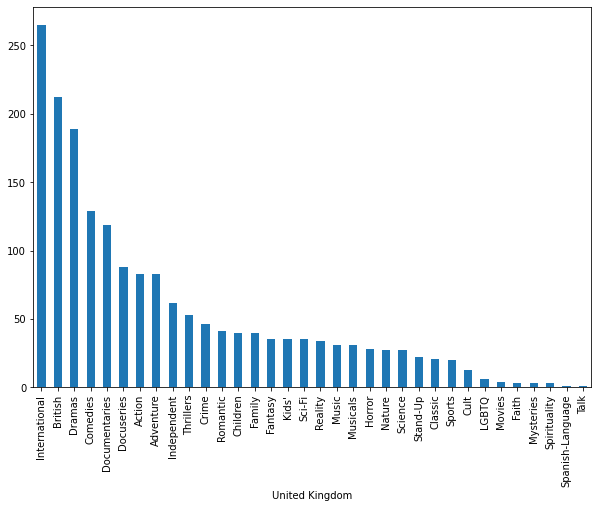

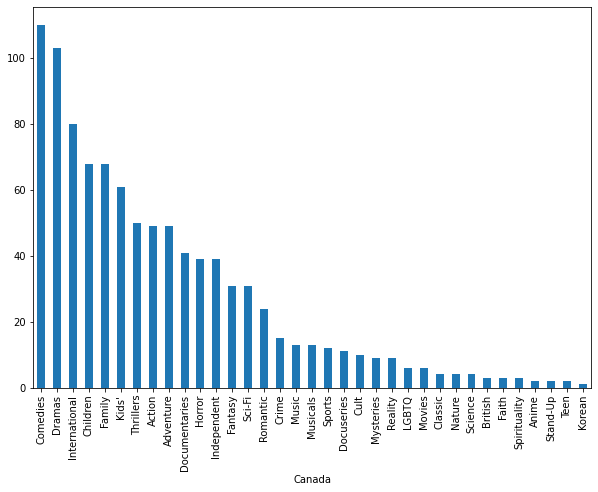

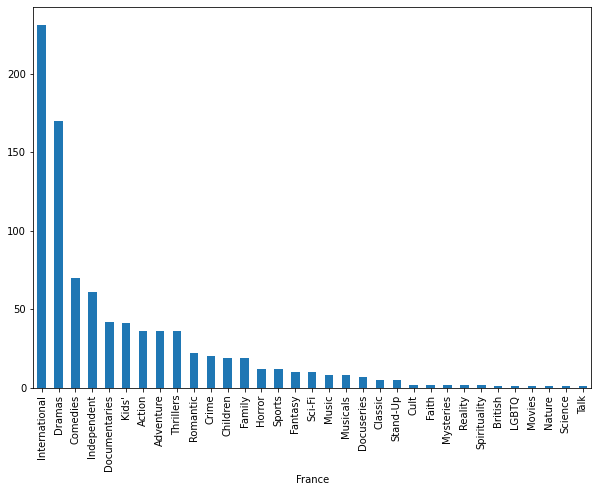

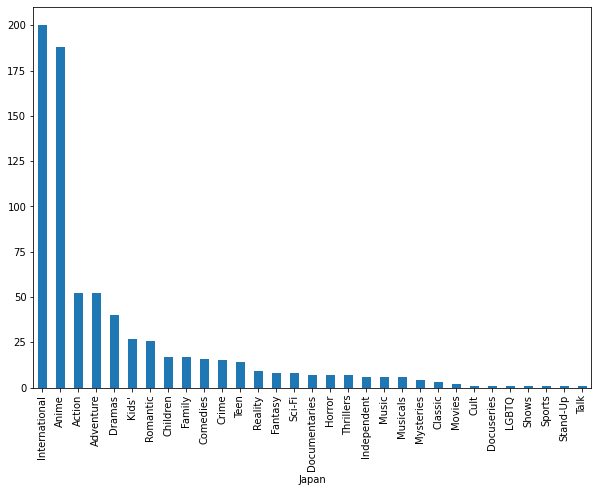

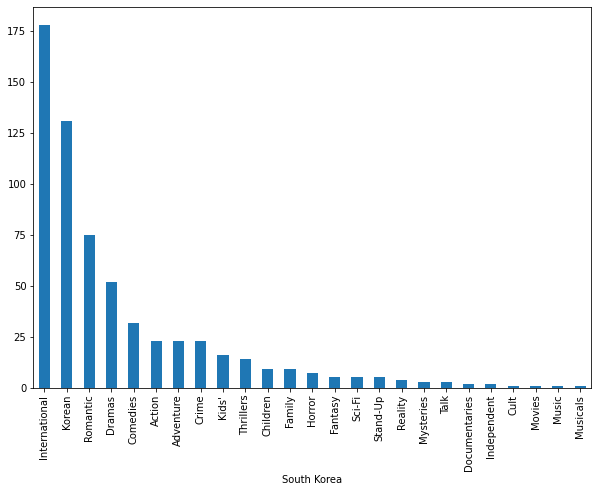

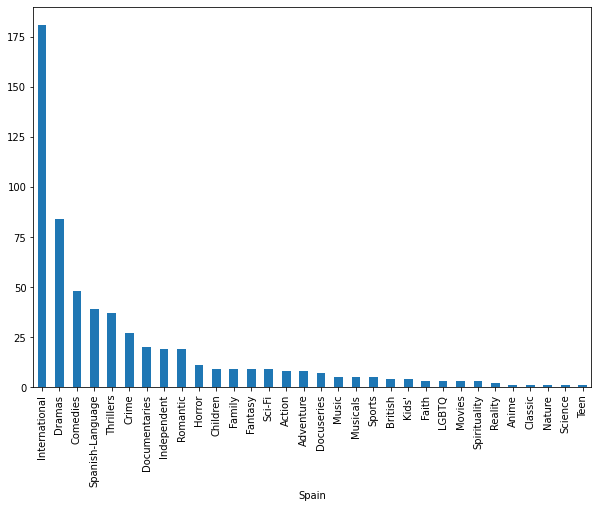

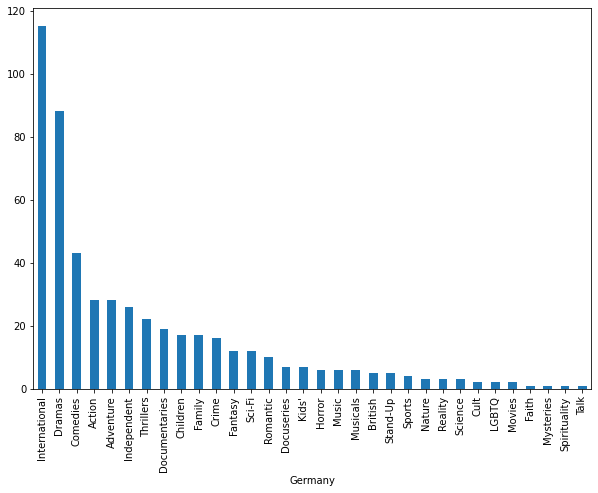

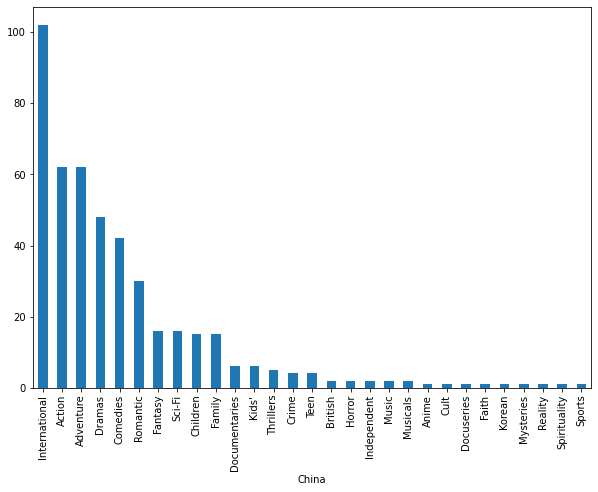

In [53]:
genre_wise_eda(cast_table,'country','listed_in')

In [54]:
cast_table.head()

,type,cast,country,target_ages,listed_in,month,min and season,title
0,TV Show,"[João Miguel, Bianca Comparato, Michel Gomes...",[Brazil],Adults,"[International TV Shows, TV Dramas, TV Sci-F...",August,4,3%
1,Movie,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",[Mexico],Adults,"[Dramas, International Movies]",December,93,7:19
2,Movie,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",[Singapore],Adults,"[Horror Movies, International Movies]",December,78,23:59
3,Movie,"[Elijah Wood, John C. Reilly, Jennifer Conne...",[United States],Teens,"[Action & Adventure, Independent Movies, Sci...",November,80,9
4,Movie,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",[United States],Teens,[Dramas],January,123,21


,genre,target_ages
cast,,
other,"{'Adults': 309, 'Teens': 181, 'Older Kids': 15...",718
Anupam Kher,"{'Teens': 28, 'Older Kids': 8, 'Adults': 6}",42
Shah Rukh Khan,"{'Teens': 26, 'Older Kids': 6, 'Adults': 3}",35
Om Puri,"{'Teens': 13, 'Older Kids': 10, 'Adults': 7}",30
Naseeruddin Shah,"{'Teens': 16, 'Adults': 9, 'Older Kids': 4, 'K...",30
Takahiro Sakurai,"{'Adults': 14, 'Teens': 11, 'Older Kids': 4}",29
Akshay Kumar,"{'Teens': 17, 'Older Kids': 10, 'Adults': 2}",29
Yuki Kaji,"{'Adults': 12, 'Teens': 12, 'Older Kids': 3}",27
Amitabh Bachchan,"{'Teens': 18, 'Older Kids': 5, 'Adults': 4}",27


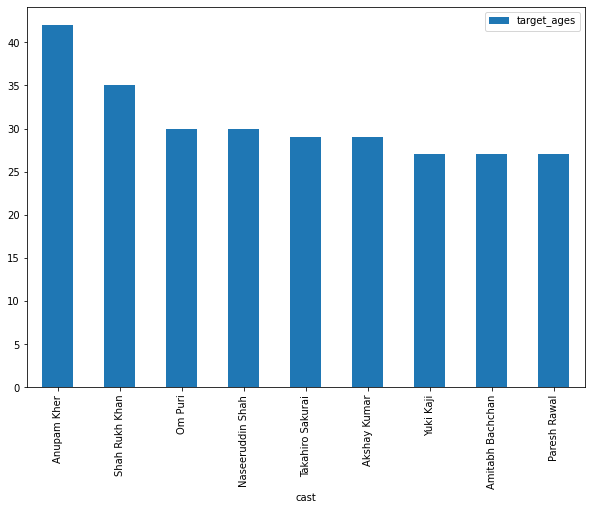

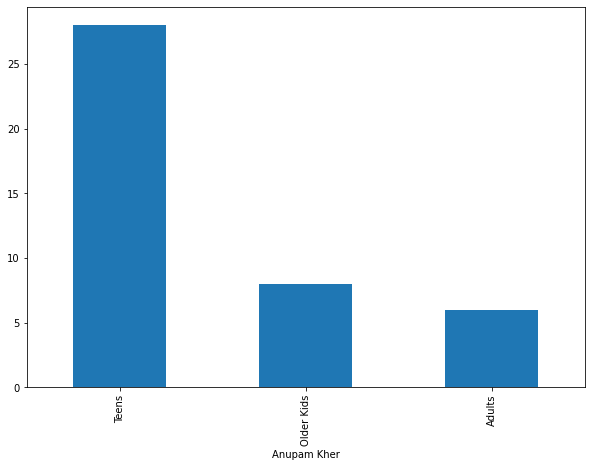

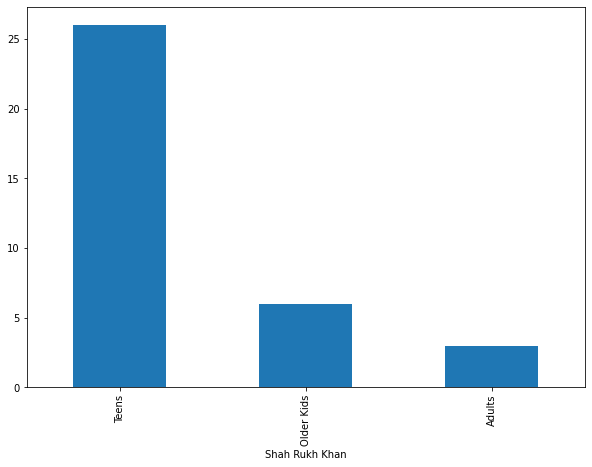

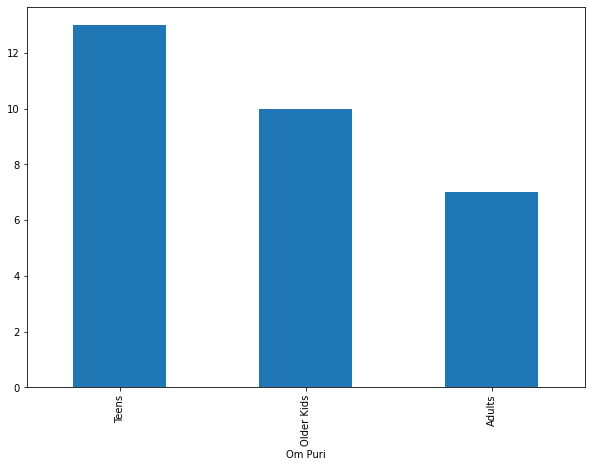

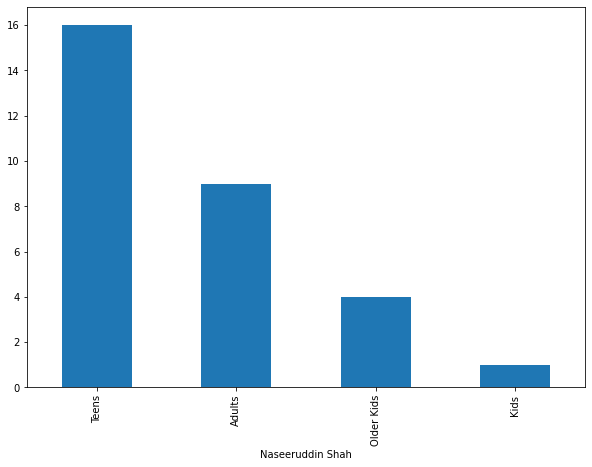

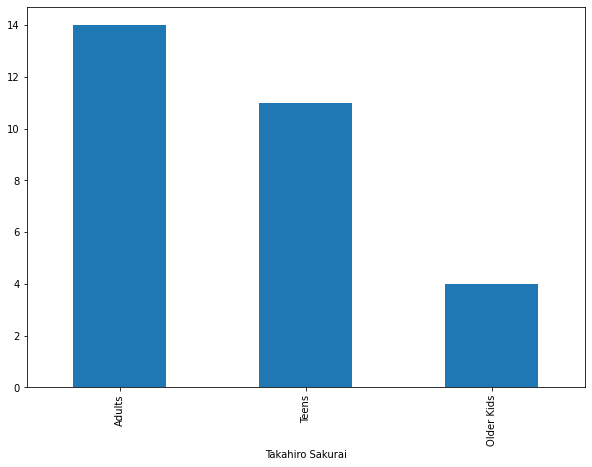

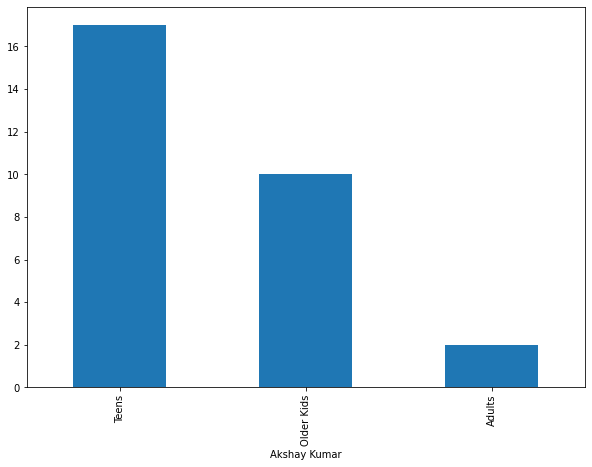

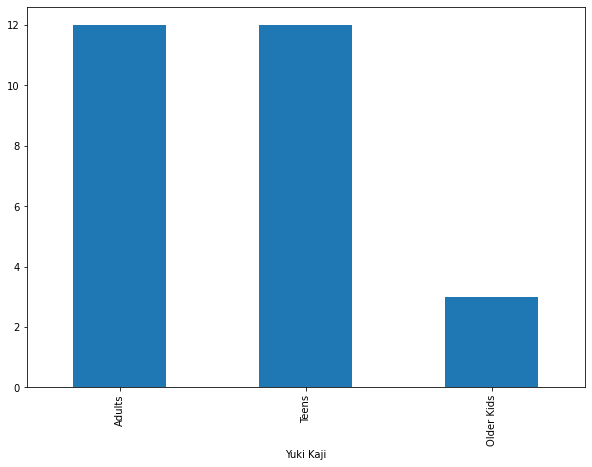

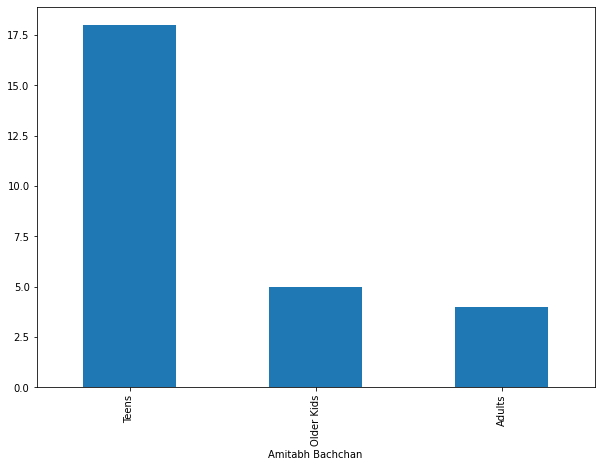

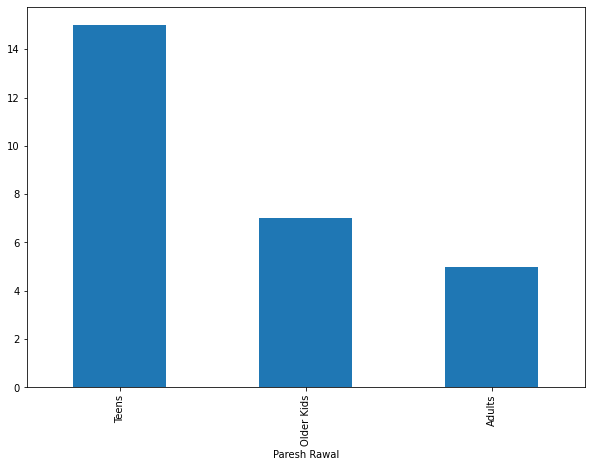

In [55]:
genre_wise_eda(cast_table,'cast','target_ages')

,genre,type
country,,
United States,"{'Movie': 46893, 'TV Show': 18030}",64923
India,"{'Movie': 21368, 'TV Show': 1005}",22373
United Kingdom,"{'Movie': 8603, 'TV Show': 4139}",12742
Canada,"{'Movie': 5586, 'TV Show': 2369}",7955
Japan,"{'TV Show': 4732, 'Movie': 3165}",7897
France,"{'Movie': 5717, 'TV Show': 1510}",7227
Spain,"{'Movie': 3218, 'TV Show': 1784}",5002
South Korea,"{'TV Show': 3418, 'Movie': 1423}",4841
Germany,"{'Movie': 3209, 'TV Show': 898}",4107


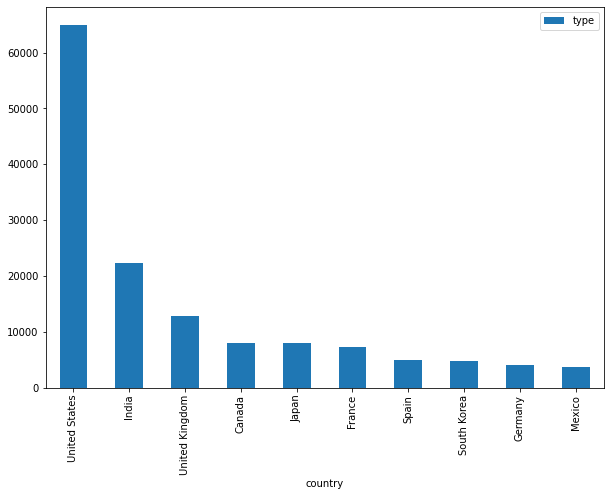

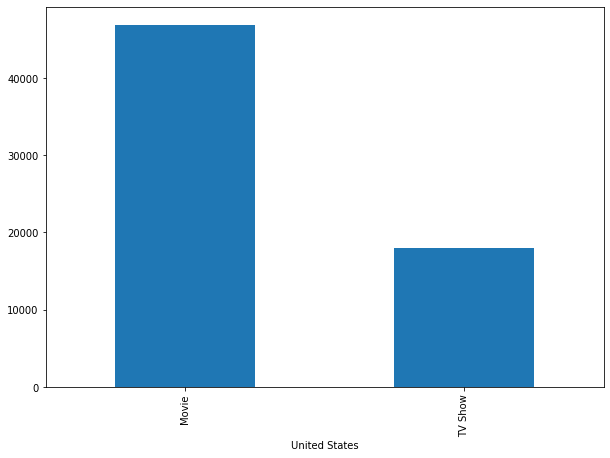

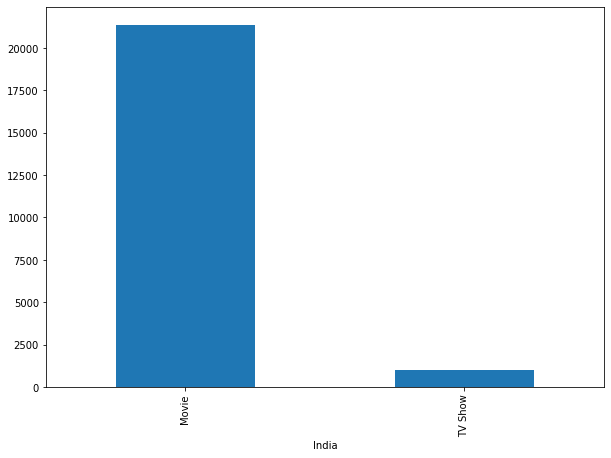

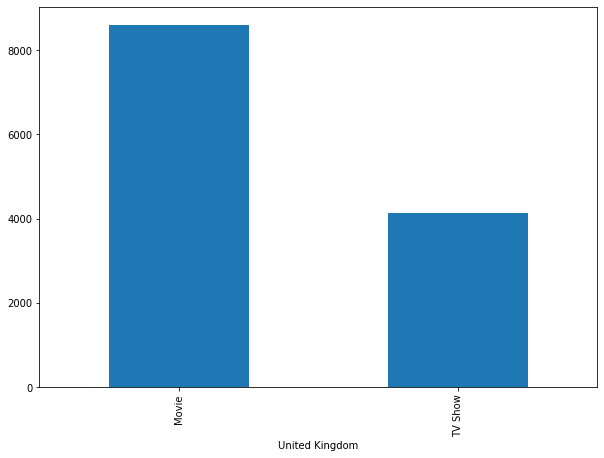

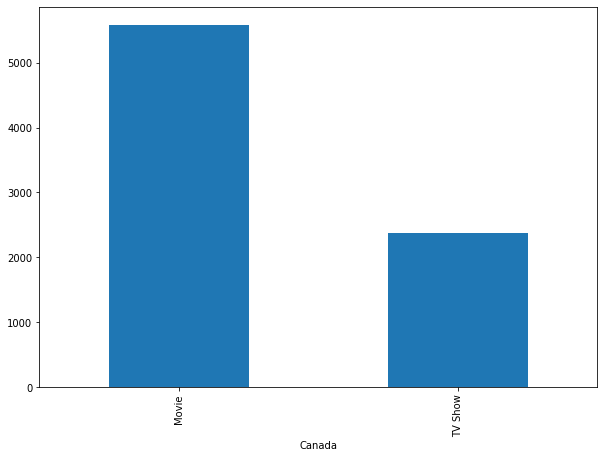

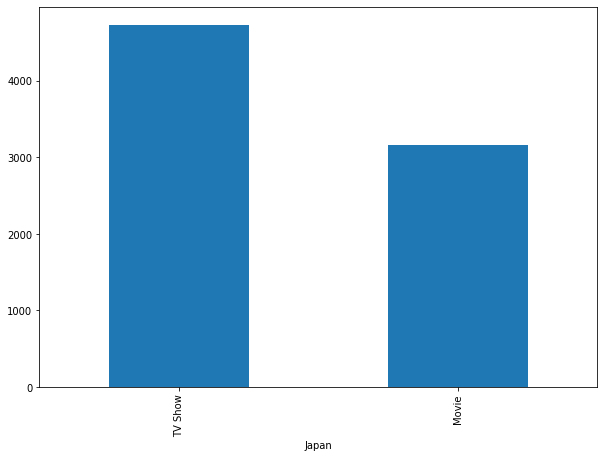

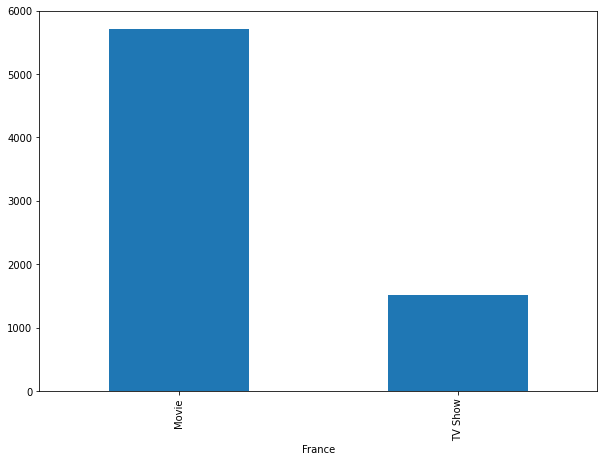

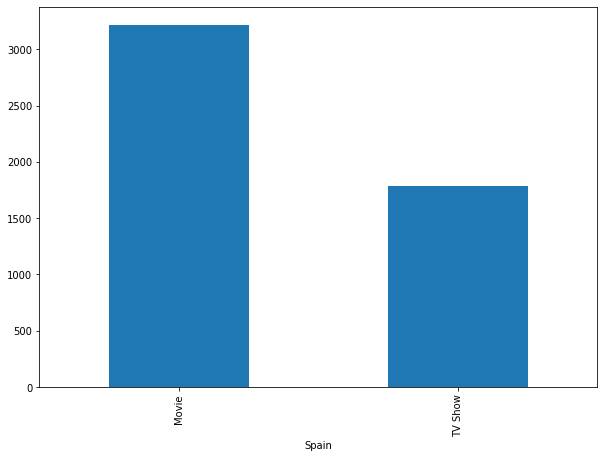

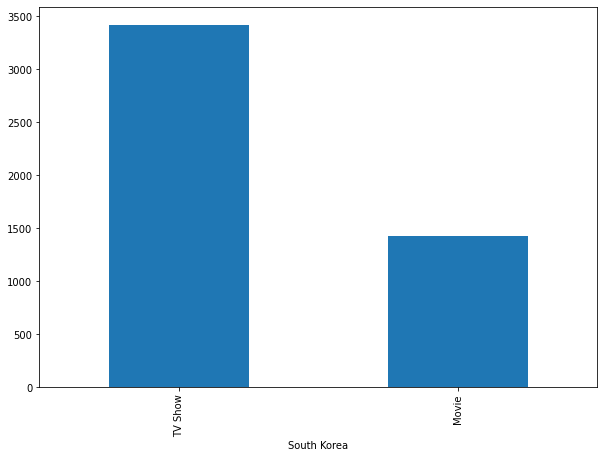

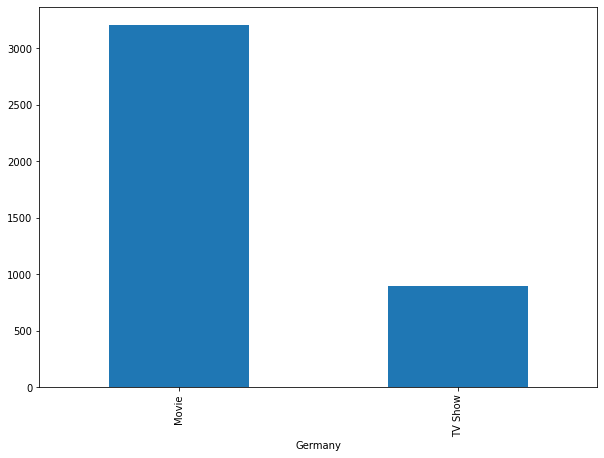

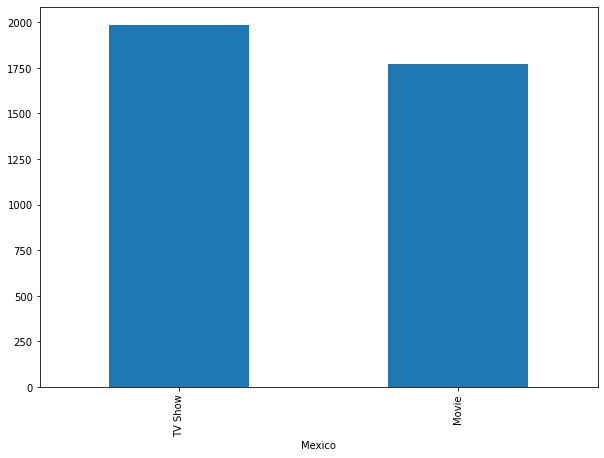

In [34]:
genre_wise_eda(cast_table,'country','type')

,genre,target_ages
country,,
United States,"{'Adults': 28789, 'Teens': 17802, 'Older Kids'...",64923
India,"{'Teens': 12936, 'Adults': 5539, 'Older Kids':...",22373
United Kingdom,"{'Adults': 7392, 'Teens': 2656, 'Older Kids': ...",12742
Canada,"{'Adults': 3327, 'Older Kids': 1948, 'Teens': ...",7955
Japan,"{'Adults': 3173, 'Teens': 2485, 'Older Kids': ...",7897
France,"{'Adults': 4913, 'Teens': 1188, 'Older Kids': ...",7227
Spain,"{'Adults': 4237, 'Teens': 371, 'Older Kids': 3...",5002
South Korea,"{'Adults': 2196, 'Teens': 1746, 'Older Kids': ...",4841
Germany,"{'Adults': 2493, 'Teens': 978, 'Older Kids': 5...",4107


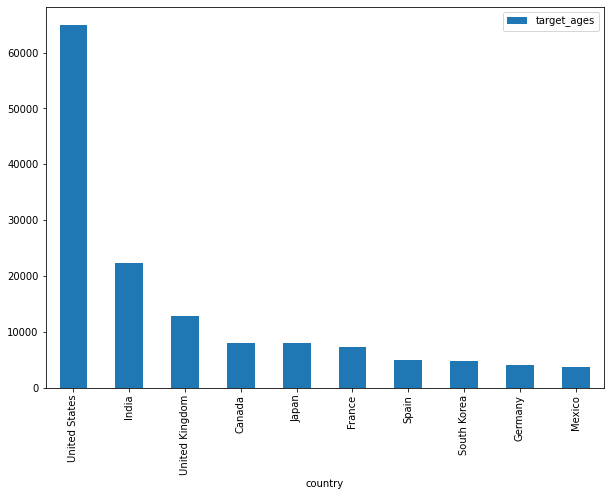

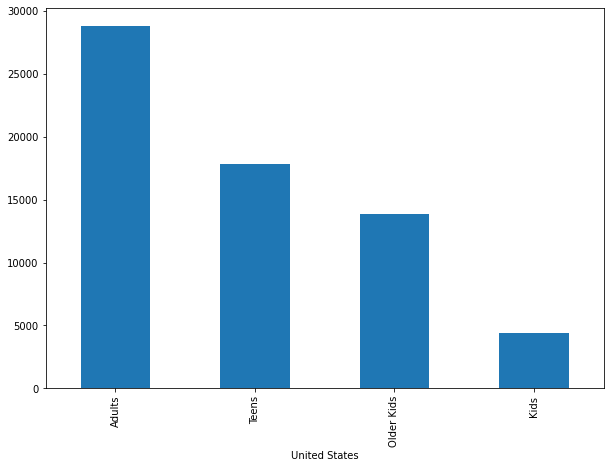

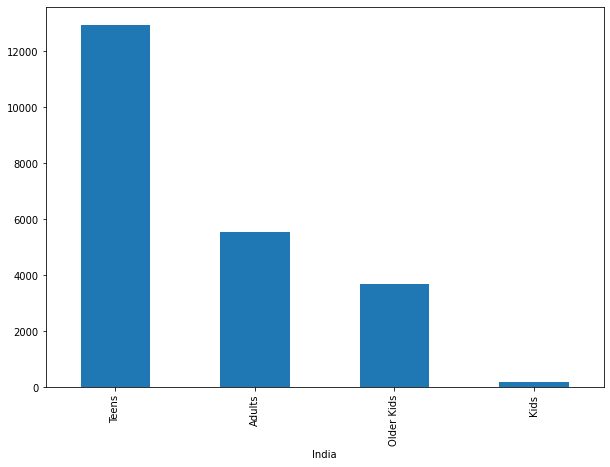

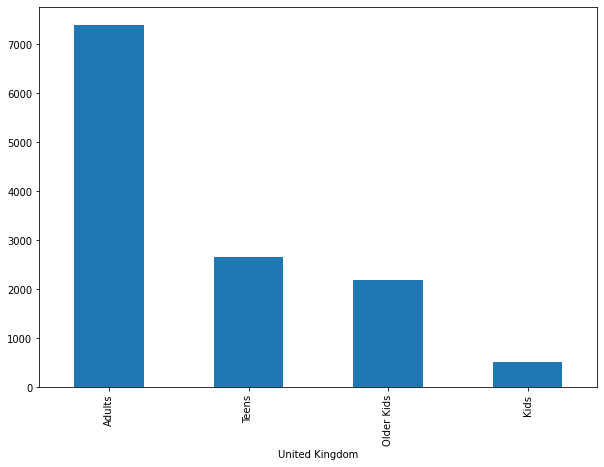

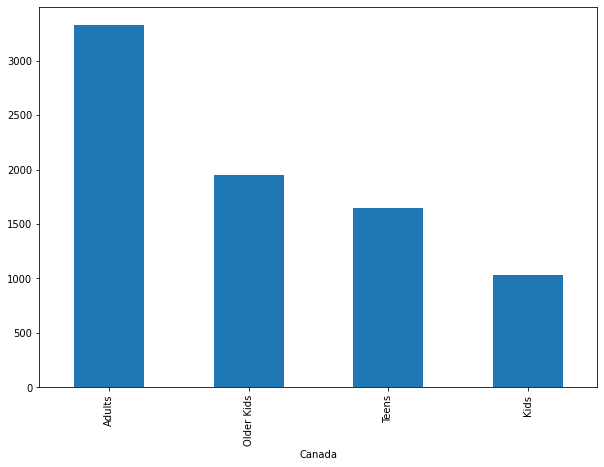

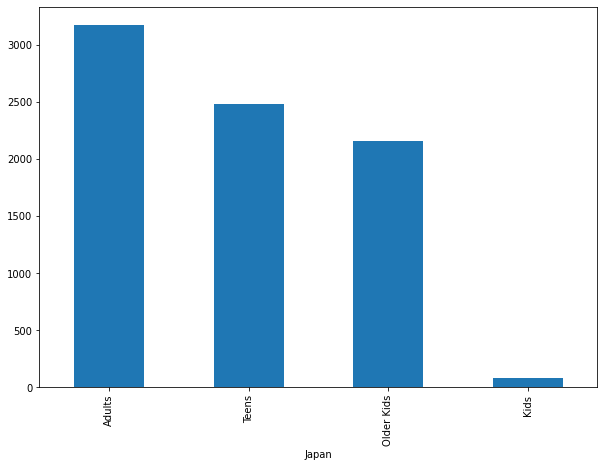

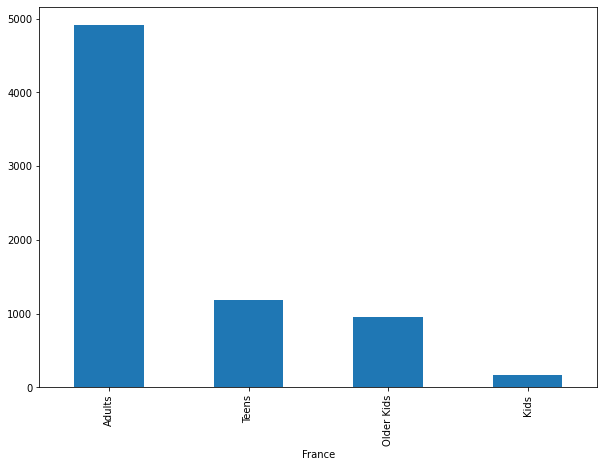

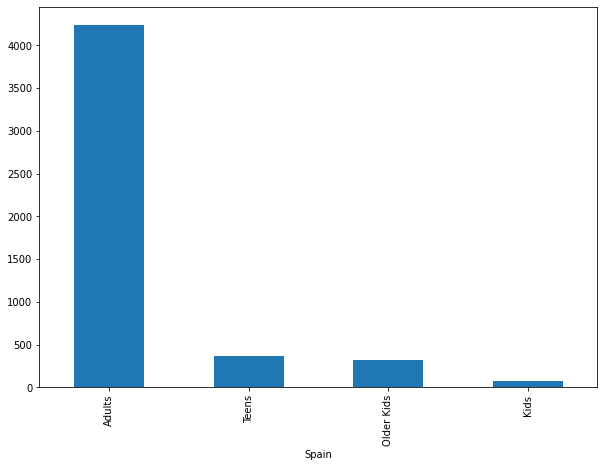

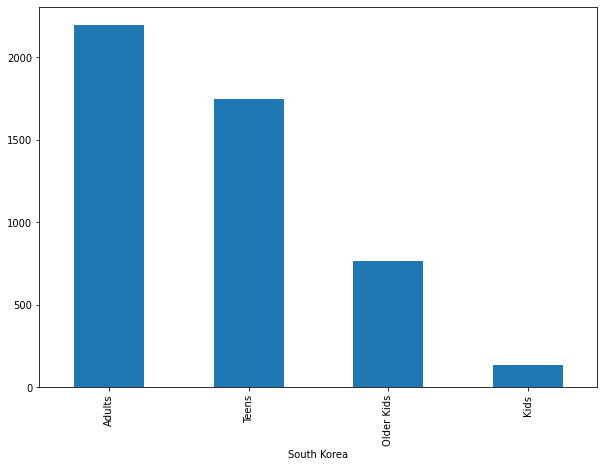

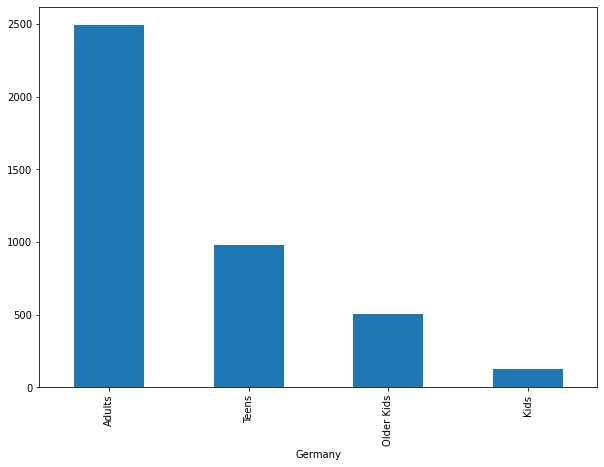

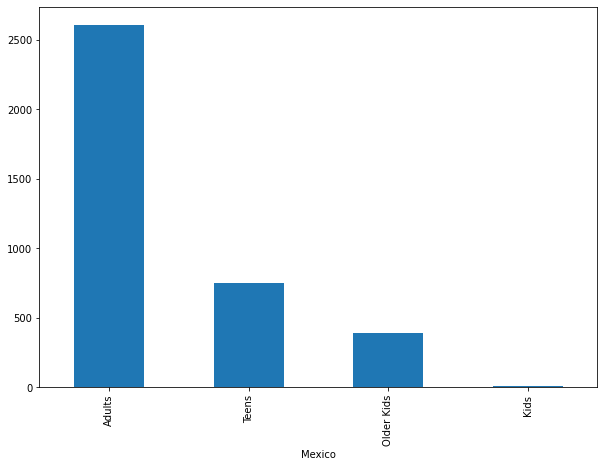

In [92]:
genre_wise_eda(cast_table,'country','target_ages')

In [36]:
netflix_data.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,month,min and season
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,4
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,93
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,78
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,80
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,123


In [37]:
import nltk
nltk.download('stopwords')
sw = stopwords.words('english')
np.array(sw)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [38]:
import nltk
nltk.download('wordnet')
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [39]:
a = netflix_data['description'][0]
a

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [40]:
import re
from nltk.stem import WordNetLemmatizer, SnowballStemmer
lemmatizer = WordNetLemmatizer()
def text_preprocessing(text):
  text = re.sub("[^a-zA-Z0-9' ]", "", text)
  text = re.sub(r'who\'ll', 'who will', text)
  text = re.sub(r'[wW]ouldn\'t', 'would not', text)
  text = re.sub(r'[mM]mustn\'t', 'must not', text)
  text = re.sub(r'[tT]hat\'s', 'that is', text)
  text = text.lower()
  text = [lemmatizer.lemmatize(word) for word in text.split() if word not in sw]

  return " ".join(text)
  

In [41]:
netflix_data['preprocessed_description'] = netflix_data['description'].apply(text_preprocessing)

In [42]:
netflix_data.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,month,min and season,preprocessed_description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,4,future elite inhabit island paradise far crowd...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,93,devastating earthquake hit mexico city trapped...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,78,army recruit found dead fellow soldier forced ...
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,80,postapocalyptic world ragdoll robot hide fear ...
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,123,brilliant group student become cardcounting ex...


In [43]:
tifid = TfidfVectorizer(max_df = 0.9,min_df = 10)
X = tifid.fit_transform(netflix_data['preprocessed_description'])

In [44]:
vocab = tifid.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [45]:
array = X.todense()

In [46]:
data_frame = pd.DataFrame(array)
data_frame

,0,1,2,3,4,5,6,7,8,9,...,2149,2150,2151,2152,2153,2154,2155,2156,2157,2158
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
words_value = np.sum(X,axis = 0)
words_value

matrix([[6.04800177, 4.58149429, 5.12997824, ..., 7.99315454, 4.38185847,
         6.61916919]])

In [48]:
word_index = np.flip(np.argsort(words_value)[0:],1)
word_index

matrix([[1105, 2154,  682, ..., 1993,  769, 1064]])

In [49]:
word_value = np.flip(np.sort(words_value)[0:],1)
word_value

matrix([[165.1811285 , 124.13005347, 119.33497825, ...,   3.38797355,
           3.26914334,   3.2636124 ]])

In [50]:
top_15_words = np.zeros((15,words_value.shape[1]))
top_15_words 


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
for i in range(15):
  top_15_words[i,word_index[0,i]] = 1

In [52]:
top_15_words

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
top_words = [word[0] for word in tifid.inverse_transform(top_15_words)]
top_words

['life',
 'young',
 'family',
 'new',
 'woman',
 'find',
 'friend',
 'love',
 'world',
 'man',
 'take',
 'two',
 'series',
 'documentary',
 'get']

In [54]:
top_word_value = word_value[0,:15].tolist()[0]
top_word_value

[165.18112849813124,
 124.13005347276112,
 119.33497825300076,
 115.43197380100136,
 115.37854536591581,
 113.58758284785183,
 108.48657195286648,
 102.0446463894197,
 101.86196072761885,
 98.61014723563572,
 93.23749557215929,
 89.90826697068243,
 79.71273970260128,
 76.70758880126483,
 74.7875284772945]

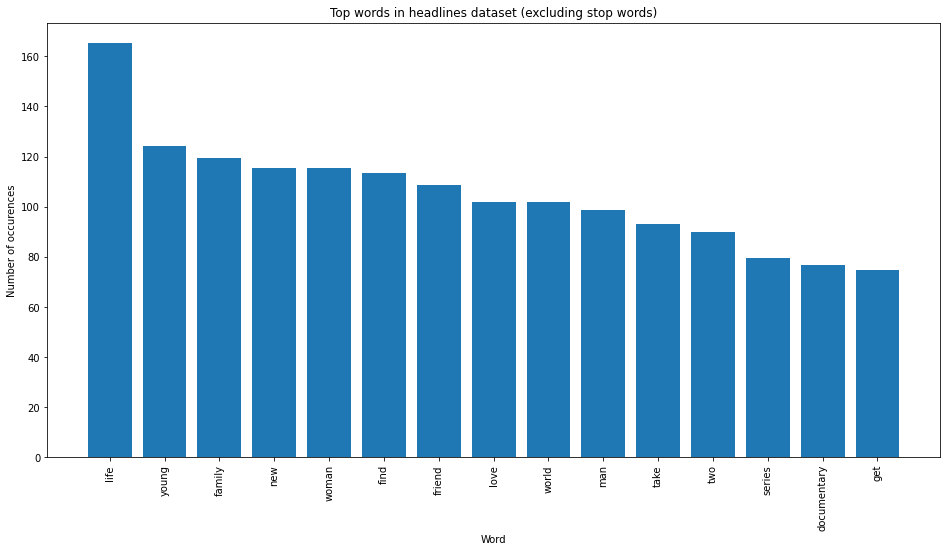

In [55]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(top_words)), top_word_value)
ax.set_xticks(range(len(top_words)))
ax.set_xticklabels(top_words, rotation='vertical')
ax.set_title('Top words in headlines dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

In [58]:
from sklearn.model_selection import GridSearchCV
grid_params = {'n_components' : list(range(5,10))}

# LDA model
lda = LatentDirichletAllocation(n_components = 5, random_state = 0)
lda_model = GridSearchCV(lda,param_grid=grid_params)
lda_model.fit(X)

# Best LDA model
best_lda_model = lda_model.best_estimator_

print("Best LDA model's params" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model",lda_model.best_score_)
print("LDA model Perplexity on train data", best_lda_model.perplexity(X))

Best LDA model's params {'n_components': 5}
Best log likelihood Score for the LDA model -47877.119477102315
LDA model Perplexity on train data 4122.455417518485


In [59]:
best_lda_model

LatentDirichletAllocation(n_components=5, random_state=0)

In [60]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=5f33db5c6d6567cf22fe7d36d2636d2830a37729fca582fcd2f35dcf12db45b3
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=69688e9ace97a5e593622c7f0bbb70f307749a5f521a752cded04f7d4ad98381
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [61]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [62]:
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, X,tifid,mds='tsne')
lda_panel

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  23.864898
2       51.163364 -159.968018       2        1  21.294210
1      -73.144554   21.523815       3        1  20.142525
0      -66.410133 -110.606438       4        1  17.568194
3       54.417324   12.443444       5        1  17.130173, topic_info=             Term       Freq       Total Category  logprob  loglift
1796      standup  38.000000   38.000000  Default  30.0000  30.0000
370      comedian  35.000000   35.000000  Default  29.0000  29.0000
552   documentary  71.000000   71.000000  Default  28.0000  28.0000
372        comedy  40.000000   40.000000  Default  27.0000  27.0000
373         comic  29.000000   29.000000  Default  26.0000  26.0000
...           ...        ...         ...      ...      ...      ...
2012          two  12.174571   83.096067   Topic5  -5.8266  -0.1563
1283          new  12.542667  106.580534   Topic5  -5.7968  -0.3754
1140         love  12.095977   94.384823   Topic5  -5.8331  -0.2902
1646       school  11.397704   63.506338   Topic5  -5.8925   0.0466
552   documentary  10.967470   71.195575   Topic5  -5.9310  -0.1062

[384 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3         1  0.896841       12
21        2  0.798053  accepts
34        2  0.054632    actor
34        3  0.327790    actor
34        5  0.600948    actor
...     ...       ...      ...
2154      2  0.347817    young
2154      3  0.034782    young
2154      4  0.182604    young
2154      5  0.165213    young
2155      1  0.899623  younger

[748 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 2, 1, 4])

In [63]:
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=0)

In [64]:
lda_panel = pyLDAvis.sklearn.prepare(lda, X,tifid,mds='tsne')
lda_panel

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  23.864898
2       51.163364 -159.968018       2        1  21.294210
1      -73.144554   21.523815       3        1  20.142525
0      -66.410133 -110.606438       4        1  17.568194
3       54.417324   12.443444       5        1  17.130173, topic_info=             Term       Freq       Total Category  logprob  loglift
1796      standup  38.000000   38.000000  Default  30.0000  30.0000
370      comedian  35.000000   35.000000  Default  29.0000  29.0000
552   documentary  71.000000   71.000000  Default  28.0000  28.0000
372        comedy  40.000000   40.000000  Default  27.0000  27.0000
373         comic  29.000000   29.000000  Default  26.0000  26.0000
...           ...        ...         ...      ...      ...      ...
2012          two  12.174571   83.096067   Topic5  -5.8266  -0.1563
1283          new  12.542667  106.580534   Topic5  -5.7968  -0.3754
1140         love  12.095977   94.384823   Topic5  -5.8331  -0.2902
1646       school  11.397704   63.506338   Topic5  -5.8925   0.0466
552   documentary  10.967470   71.195575   Topic5  -5.9310  -0.1062

[384 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3         1  0.896841       12
21        2  0.798053  accepts
34        2  0.054632    actor
34        3  0.327790    actor
34        5  0.600948    actor
...     ...       ...      ...
2154      2  0.347817    young
2154      3  0.034782    young
2154      4  0.182604    young
2154      5  0.165213    young
2155      1  0.899623  younger

[748 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 2, 1, 4])

In [65]:
lda.components_

array([[4.16667443, 0.20506945, 1.37476466, ..., 1.55610462, 1.22248697,
        3.8365863 ],
       [0.20579546, 0.20069017, 0.200279  , ..., 0.20296514, 0.20058396,
        0.20048683],
       [0.20750088, 0.20018107, 0.20066179, ..., 0.20499443, 0.20139022,
        1.32170868],
       [2.2506147 , 1.99144579, 2.28094418, ..., 0.20328146, 2.85981345,
        0.20328092],
       [0.2174163 , 2.98410781, 2.07332862, ..., 6.82580889, 0.89758387,
        2.05710646]])

In [66]:
lda.exp_dirichlet_component_

array([[8.08477494e-04, 1.26336242e-06, 2.01386868e-04, ...,
        2.39961818e-04, 1.69338449e-04, 7.36156022e-04],
       [1.09570324e-06, 9.62076792e-07, 9.51789356e-07, ...,
        1.02026956e-06, 9.59412805e-07, 9.56980500e-07],
       [1.09361231e-06, 9.08491126e-07, 9.19988851e-07, ...,
        1.02778686e-06, 9.37586598e-07, 1.55007196e-04],
       [4.06492836e-04, 3.47905158e-04, 4.13362953e-04, ...,
        1.25923012e-06, 5.44858404e-04, 1.25921291e-06],
       [1.19745635e-06, 3.88909824e-04, 2.48608776e-04, ...,
        9.84893732e-04, 7.27680987e-05, 2.46122486e-04]])

In [67]:
topic_words = {}
for topic, comp in enumerate(lda.components_):
    # for the n-dimensional array "arr":
    # argsort() returns a ranked n-dimensional array of arr, call it "ranked_array"
    # which contains the indices that would sort arr in a descending fashion
    # for the ith element in ranked_array, ranked_array[i] represents the index of the
    # element in arr that should be at the ith index in ranked_array
    # ex. arr = [3,7,1,0,3,6]
    # np.argsort(arr) -> [3, 2, 0, 4, 5, 1]
    # word_idx contains the indices in "topic" of the top num_top_words most relevant
    # to a given topic ... it is sorted ascending to begin with and then reversed (desc. now)    
    word_idx = np.argsort(comp)[::-1][:15]

    # store the words most relevant to the topic
    topic_words[topic] = [vocab[i] for i in word_idx]

In [68]:
for topic, words in topic_words.items():
    print('Topic: %d' % topic)
    print('  %s' % ', '.join(words))

Topic: 0
  friend, adventure, world, evil, new, young, power, save, life, series, battle, magical, animal, find, earth
Topic: 1
  documentary, life, standup, comedian, special, series, comedy, story, comic, take, show, star, world, film, stage
Topic: 2
  young, life, love, man, woman, family, school, fall, father, two, high, find, new, son, teen
Topic: 3
  life, family, young, man, take, friend, one, find, woman, begin, return, people, get, home, couple
Topic: 4
  find, must, woman, new, two, friend, young, life, family, love, world, get, man, help, work


In [69]:
Topics = pd.DataFrame(topic_words)

In [71]:
Topics.columns = ['Topic_1','Topic_2','Topic_3','Topic_4','Topic_5']

In [72]:
Topics

,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5
0,friend,documentary,young,life,find
1,adventure,life,life,family,must
2,world,standup,love,young,woman
3,evil,comedian,man,man,new
4,new,special,woman,take,two
5,young,series,family,friend,friend
6,power,comedy,school,one,young
7,save,story,fall,find,life
8,life,comic,father,woman,family
9,series,take,two,begin,love
